In [1]:
# importing important libraries 
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
#writing the needed data 
# x represents the input data which is features and y reprsents the output which is the target reprsents the house price in thousands

X = [50, 60, 70, 80, 90]
y = [150, 180, 210, 240, 270]


In [ ]:
# x is converted to numpy array and y is also converted to numpy array
X = np.array(X)
y = np.array(y)


In [ ]:
# creating class named with LinearRegressionGD to be able to take an instance from it 
#where theta_0 represents the in intercept in y and theta_1 represents the sloope itself
class LinearRegressionGD:

    def __init__(self, learning_rate=0.001, n_iters=100):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.theta_0 = 0
        self.theta_1 = 0
        self.sse_history = []

    def fit(self, X, y):
        n = len(X)

        for _ in range(self.n_iters):
            y_pred = self.theta_0 + self.theta_1 * X

            error = y_pred - y

            # gradients
            d_theta0 = (2/n) * np.sum(error)
            d_theta1 = (2/n) * np.sum(error * X)

            # update
            self.theta_0 -= self.lr * d_theta0
            self.theta_1 -= self.lr * d_theta1

            # SSE
            sse = np.sum(error**2)
            self.sse_history.append(sse)

    def predict(self, X):
        return self.theta_0 + self.theta_1 * X
    # calculating the MSE 
    def mse(self, X, y):
        y_pred = self.predict(X)
        return np.mean((y - y_pred) ** 2)

    def plot_training(self, X, y):
        # SSE curve
        plt.figure()
        plt.plot(self.sse_history)
        plt.title("SSE over iterations")
        plt.xlabel("Iterations")
        plt.ylabel("SSE")
        plt.show()

        # regression line
        plt.figure()
        plt.scatter(X, y, color='blue')
        y_pred = self.predict(X)
        plt.plot(X, y_pred, color='red')
        plt.title("Regression Line")
        plt.show()


In [13]:
model = LinearRegressionGD(learning_rate=0.001, n_iters=100)


In [14]:
model.fit(X, y)


In [15]:
print("theta_0 =", model.theta_0)
print("theta_1 =", model.theta_1)


theta_0 = -1.0055957901462392e+95
theta_1 = -7.326427288635144e+96


In [16]:
pred = model.predict(70)
print("Predicted price:", pred)
# yes the prediction is resonable 


Predicted price: -5.129504697834747e+98


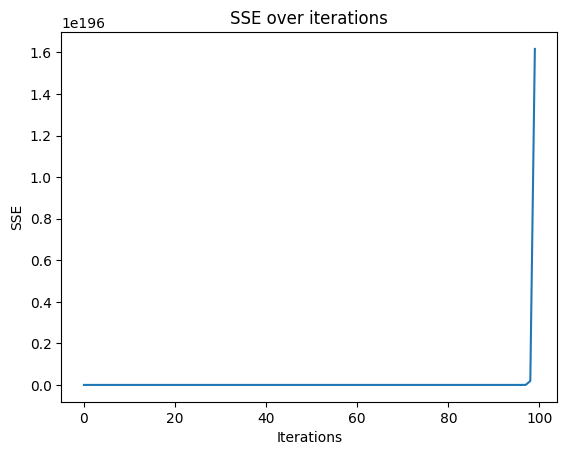

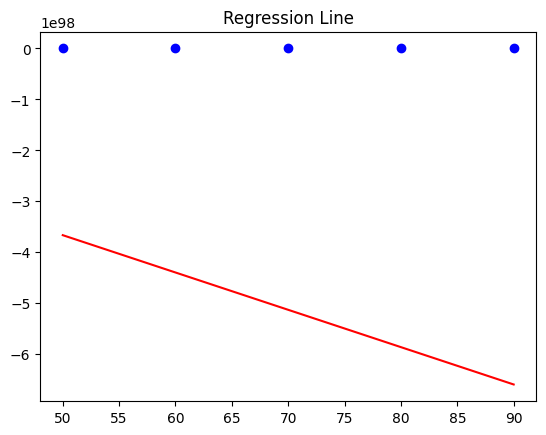

In [17]:
#the SSE decreses as gradient decient  updates the parameters theta_0 and theta_1 as iterations passes
#Convergence means that the algorithm has reached the semi optimal  parameter values and there is no big change in the model 
model.plot_training(X, y)


In [18]:
#, the updates to the parameters theta_o theta_1 becomes to big and the model may fail to converge
model_big = LinearRegressionGD(learning_rate=0.1, n_iters=100)
model_big.fit(X, y)
print("Final SSE (big lr):", model_big.sse_history[-1])


Final SSE (big lr): inf


C:\Users\El-Wattaneya\AppData\Local\Temp\ipykernel_3392\3224538657.py:29: RuntimeWarning: overflow encountered in square
  sse = np.sum(error**2)


In [19]:
model_small = LinearRegressionGD(learning_rate=0.000001, n_iters=100)
model_small.fit(X, y)
print("Final SSE (small lr):", model_small.sse_history[-1])


Final SSE (small lr): 30130.80602713573


In [ ]:
# importing the needed  libraries for polynomial, lasso & ridge

import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:

X = np.array([50, 60, 70, 80, 90])
y = np.array([150, 180, 210, 240, 270])
# Reshape X because sklearn models expect 2D input
X = X.reshape(-1, 1)

In [ ]:
## Train Linear Regression model using sklearn
lin_model = LinearRegression()
lin_model.fit(X, y)

lin_pred = lin_model.predict(X)

In [ ]:
# Convert input features into polynomial features
degree = 2

poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)

poly_model = LinearRegression()
poly_model.fit(X_poly, y)

poly_pred = poly_model.predict(X_poly)

In [ ]:
## Train Ridge Regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_poly, y)

ridge_pred = ridge_model.predict(X_poly)

In [ ]:
# Train Lasso Regression model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_poly, y)

lasso_pred = lasso_model.predict(X_poly)

In [ ]:
# Evaluate models using performance metrics
# Print results for comparison
models = {
    "Linear": lin_pred,
    "Polynomial": poly_pred,
    "Ridge": ridge_pred,
    "Lasso": lasso_pred
}

print("\nModel Performance:\n")

for name, pred in models.items():
    print(name)
    print("MSE:", mean_squared_error(y, pred))
    print("R2 :", r2_score(y, pred))
    print("--------------------")


Model Performance:

Linear
MSE: 0.0
R2 : 1.0
--------------------
Polynomial
MSE: 2.1358061910060596e-25
R2 : 1.0
--------------------
Ridge
MSE: 0.19494626997600614
R2 : 0.99989169651668
--------------------
Lasso
MSE: 0.001165368037979654
R2 : 0.9999993525733122
--------------------


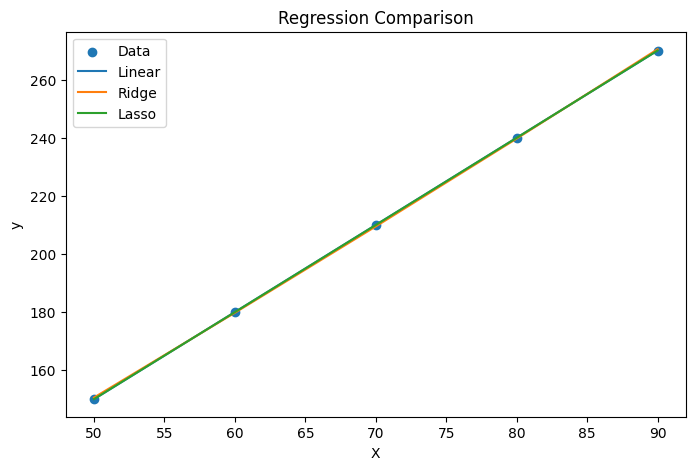

In [9]:
plt.figure(figsize=(8,5))

X_sorted = np.sort(X, axis=0)

plt.scatter(X, y, label="Data")

# Predictions for plotting
plt.plot(X_sorted,
         lin_model.predict(X_sorted),
         label="Linear")

plt.plot(X_sorted,
         ridge_model.predict(poly.transform(X_sorted)),
         label="Ridge")

plt.plot(X_sorted,
         lasso_model.predict(poly.transform(X_sorted)),
         label="Lasso")

plt.legend()
plt.title("Regression Comparison")
plt.xlabel("X")
plt.ylabel("y")

plt.show()